# JensonShannon

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as st
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import poisson
import os

In [2]:
def js(p, q):
    p1 = p / np.linalg.norm(p, ord=1)
    q1 = q / np.linalg.norm(q, ord=1)
    m = 0.5 * (p1 + q1)
    r = 0.5 * (entropy(p1, m) + entropy(q1, m))
    return r

In [3]:
wh_dataset = os.path.join('datasets','weight-height.csv')
whData = pd.read_csv(wh_dataset)
whData.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
ideal = norm.rvs(size=len(whData['Height']), loc=whData['Height'].mean(), scale=whData['Height'].std())
ideal_count, ideal_devision = np.histogram(ideal, bins=100)

In [5]:
count, devision = np.histogram(whData['Height'], bins=100)

In [6]:
js(count, ideal_count)

np.float64(0.02173975361090202)

In [7]:
ws_dataset = os.path.join('datasets','wind_speed_laurel_nebraska.csv')
wsData = pd.read_csv(ws_dataset)
wsData.head()

,10 Min Std Dev,Time,10 Min Sampled Avg
0,2.73,2001-06-11 11:00,22.3
1,1.98,2001-06-11 11:10,23.0
2,1.87,2001-06-11 11:20,23.3
3,2.03,2001-06-11 11:30,22.0
4,3.10,2001-06-11 11:40,20.5


In [8]:
ideal = norm.rvs(size=len(wsData['10 Min Sampled Avg']), loc=wsData['10 Min Sampled Avg'].mean(), scale=wsData['10 Min Sampled Avg'].std())
ideal_count, ideal_devision = np.histogram(ideal, bins=100)

In [9]:
count, devision = np.histogram(wsData['10 Min Sampled Avg'], bins=100)

In [10]:
js(count, ideal_count)

np.float64(0.14560837616854738)

<Axes: >

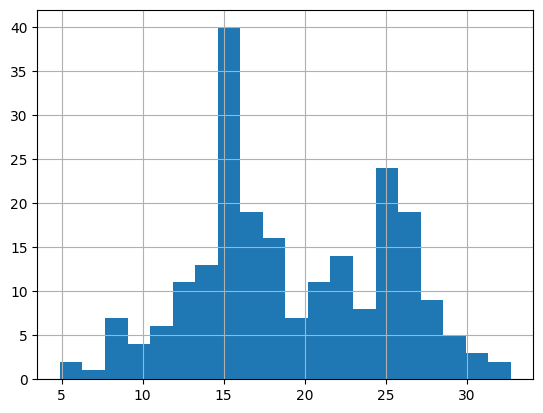

In [11]:
wsData['10 Min Sampled Avg'].hist(bins=20)

Remember: ```js(p, q) == js(q, p)```